<a href="https://colab.research.google.com/github/SushRed10/22MCB0005/blob/main/22MCB0005_SNA_Assessment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
from sklearn import metrics
from sklearn.cluster import KMeans

#Dataset link: https://www.kaggle.com/datasets/fivethirtyeight/fivethirtyeight-comic-characters-dataset?select=marvel-wikia-data.csv

In [ ]:
df1 = pd.read_csv('/content/marvel-wikia-data.csv',encoding='utf-8',nrows=30)


df1[['First Name1', 'Other Name']] = df1['name'].str.split('-', 1, expand=True)
df1[['First Name', 'Other Name']] = df1['First Name1'].str.split(' ', 1, expand=True)

# Dropped due to many null values
#df1 = df1.drop('GSM', axis=1)
#df1 = df1.drop('urlslug', axis=1)
#df1 = df1.drop('Other Name',axis=1)
#df1 = df1.drop('First Name1',axis=1)

df1.head(10)

<ipython-input-49-382bf28d8023>:4: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df1[['First Name1', 'Other Name']] = df1['name'].str.split('-', 1, expand=True)
<ipython-input-49-382bf28d8023>:5: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df1[['First Name', 'Other Name']] = df1['First Name1'].str.split(' ', 1, expand=True)


,page_id,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year,First Name
0,1678,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,Living Characters,4043,Aug-62,1962.0,Spider
1,7139,Captain America (Steven Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,Living Characters,3360,Mar-41,1941.0,Captain
2,64786,"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,3061,Oct-74,1974.0,Wolverine
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,2961,Mar-63,1963.0,Iron
4,2460,Thor (Thor Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,2258,Nov-50,1950.0,Thor
5,2458,Benjamin Grimm (Earth-616),Public Identity,Good Characters,Blue Eyes,No Hair,Male Characters,Living Characters,2255,Nov-61,1961.0,Benjamin
6,2166,Reed Richards (Earth-616),Public Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Living Characters,2072,Nov-61,1961.0,Reed
7,1833,Hulk (Robert Bruce Banner),Public Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Living Characters,2017,May-62,1962.0,Hulk
8,29481,Scott Summers (Earth-616),Public Identity,Neutral Characters,Brown Eyes,Brown Hair,Male Characters,Living Characters,1955,Sep-63,1963.0,Scott
9,1837,Jonathan Storm (Earth-616),Public Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,1934,Nov-61,1961.0,Jonathan


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           30 non-null     int64  
 1   name              30 non-null     object 
 2   ID                30 non-null     object 
 3   ALIGN             30 non-null     object 
 4   EYE               30 non-null     object 
 5   HAIR              30 non-null     object 
 6   SEX               30 non-null     object 
 7   ALIVE             30 non-null     object 
 8   APPEARANCES       30 non-null     int64  
 9   FIRST APPEARANCE  29 non-null     object 
 10  Year              29 non-null     float64
 11  First Name        30 non-null     object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.9+ KB


In [ ]:
df1.isnull().sum()

page_id             0
name                0
ID                  0
ALIGN               0
EYE                 0
HAIR                0
SEX                 0
ALIVE               0
APPEARANCES         0
FIRST APPEARANCE    1
Year                1
First Name          0
dtype: int64

In [ ]:
#We have filled the null values
df1 = df1.fillna(method='bfill')
df1.isnull().sum()

page_id             0
name                0
ID                  0
ALIGN               0
EYE                 0
HAIR                0
SEX                 0
ALIVE               0
APPEARANCES         0
FIRST APPEARANCE    0
Year                0
First Name          0
dtype: int64

In [ ]:

G = nx.Graph()

names =   set(df1.iloc[:, 11])
ids =     set(df1.iloc[:, 2])
aligns =  set(df1.iloc[:, 3])
hairs =   set(df1.iloc[:, 5])

names = list(names)
ids = list(ids)
aligns = list(aligns)
hair = list(hairs)

# Add nodes to the graph
for id in ids:
   G.add_node(id, node_type='id')
for align in aligns:
    G.add_node(align, node_type='align')
for hair in hairs:
    G.add_node(hair, node_type='hair')
for name in names:
   G.add_node(name, node_type='name')

# Add edges to the graph
for _, row in df1.iterrows():
    names = row[11]
    ids = row['ID']
    G.add_edge(names,ids)

for _, row in df1.iterrows():
    names = row[11]
    aligns = row['ALIGN']
    G.add_edge(names,aligns)

for _, row in df1.iterrows():
    name = row[11]
    hairs = row['HAIR']
    G.add_edge(name, hairs)


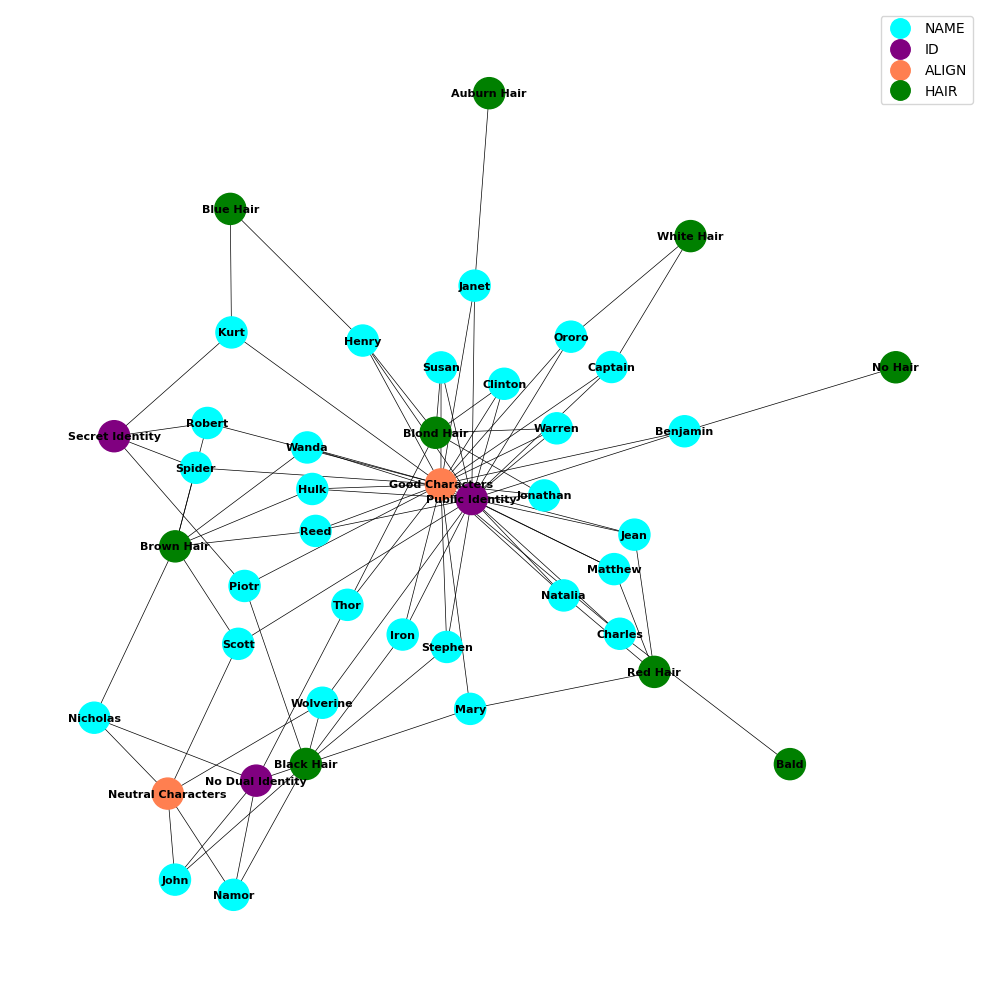

In [ ]:
plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
pos = nx.spring_layout(G, scale=20)  # Specify the layout algorithm and increase the scale

#node_colors = {'ids': 'aqua', 'aligns': 'purple', 'names': 'coral'}  #, 'HAIR': 'green'
#node_types = nx.get_node_attributes(G, 'node_type')
# Specify a default color for nodes not found in the dictionary
#default_color = 'green'
#node_color = [node_colors.get(node_types.get(node, ''), default_color) for node in G.nodes]

node_colors = {'name': 'aqua', 'id': 'purple', 'align': 'coral','hair':'green'}
node_types = nx.get_node_attributes(G, 'node_type')
node_color = [node_colors[node_types[node]] for node in G.nodes]
edge_color = 'black'  # Specify the edge color
edge_width = 0.5  # Specify the edge width

nx.draw_networkx(
    G, pos=pos, node_color=node_color, with_labels=True,
    node_size=500, font_size=8, font_weight='bold',
    edge_color=edge_color, width=edge_width
)

# Create a legend for the node colors
legend_labels = ['NAME', 'ID', 'ALIGN', 'HAIR']
legend_colors = node_colors.values()
legend_handles = [plt.Line2D([], [], marker='o', markersize=14, color=color, linestyle='None')
                  for color in legend_colors]
plt.legend(legend_handles, legend_labels)

# Display the graph
plt.axis('off')  # Remove the axis
plt.tight_layout()  # Adjust the layout
plt.show()


# Clustering and Classification

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity

# Convert node types into a list of strings
node_features = nx.get_node_attributes(G, 'node_type')
feature_values = list(node_features.values())

# Perform one-hot encoding on the feature values
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(np.array(feature_values).reshape(-1, 1))

# Calculate the similarity matrix using cosine similarity
similarity_matrix = cosine_similarity(encoded_features)
# Perform clustering on the similarity matrix
num_clusters = 3
cluster_colors = ['red', 'blue', 'green','cyan', 'magenta', 'brown', 'orange', 'purple', 'pink', 'yellow']


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Function to print the clustered graph
def print_clustered(algorithm):
  # Visualize the graph with node colors based on clusters
  plt.figure(figsize=(12, 12))
  pos = nx.spring_layout(G, scale=20)
  node_clusters = nx.get_node_attributes(G, 'cluster')
  node_color = [cluster_colors[node_clusters[node]] for node in G.nodes]
  edge_color = 'black'
  edge_width = 0.5

  nx.draw_networkx(
      G, pos=pos, node_color=node_color, with_labels=True,
      node_size=1200, font_size=8, font_weight='bold',
      edge_color=edge_color, width=edge_width
  )
  # Create a legend for the cluster colors
  legend_labels = [f"cluster {i+1} ({algorithm})" for i in range(len(cluster_colors))]
  legend_colors = cluster_colors[:num_clusters]
  legend_handles = [plt.Line2D([], [], marker='o', markersize=14, color=color, linestyle='None')
                    for color in legend_colors]
  plt.legend(legend_handles, legend_labels)

  # Display the graph
  plt.axis('off')
  plt.tight_layout()
  plt.show()
  # Calculate clustering evaluation metrics
  labels_true = list(node_clusters.values())
  silhouette_score = metrics.silhouette_score(encoded_features, labels_true)
  adjusted_rand_index = metrics.adjusted_rand_score(labels_true, clustering)
  return (silhouette_score,adjusted_rand_index)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


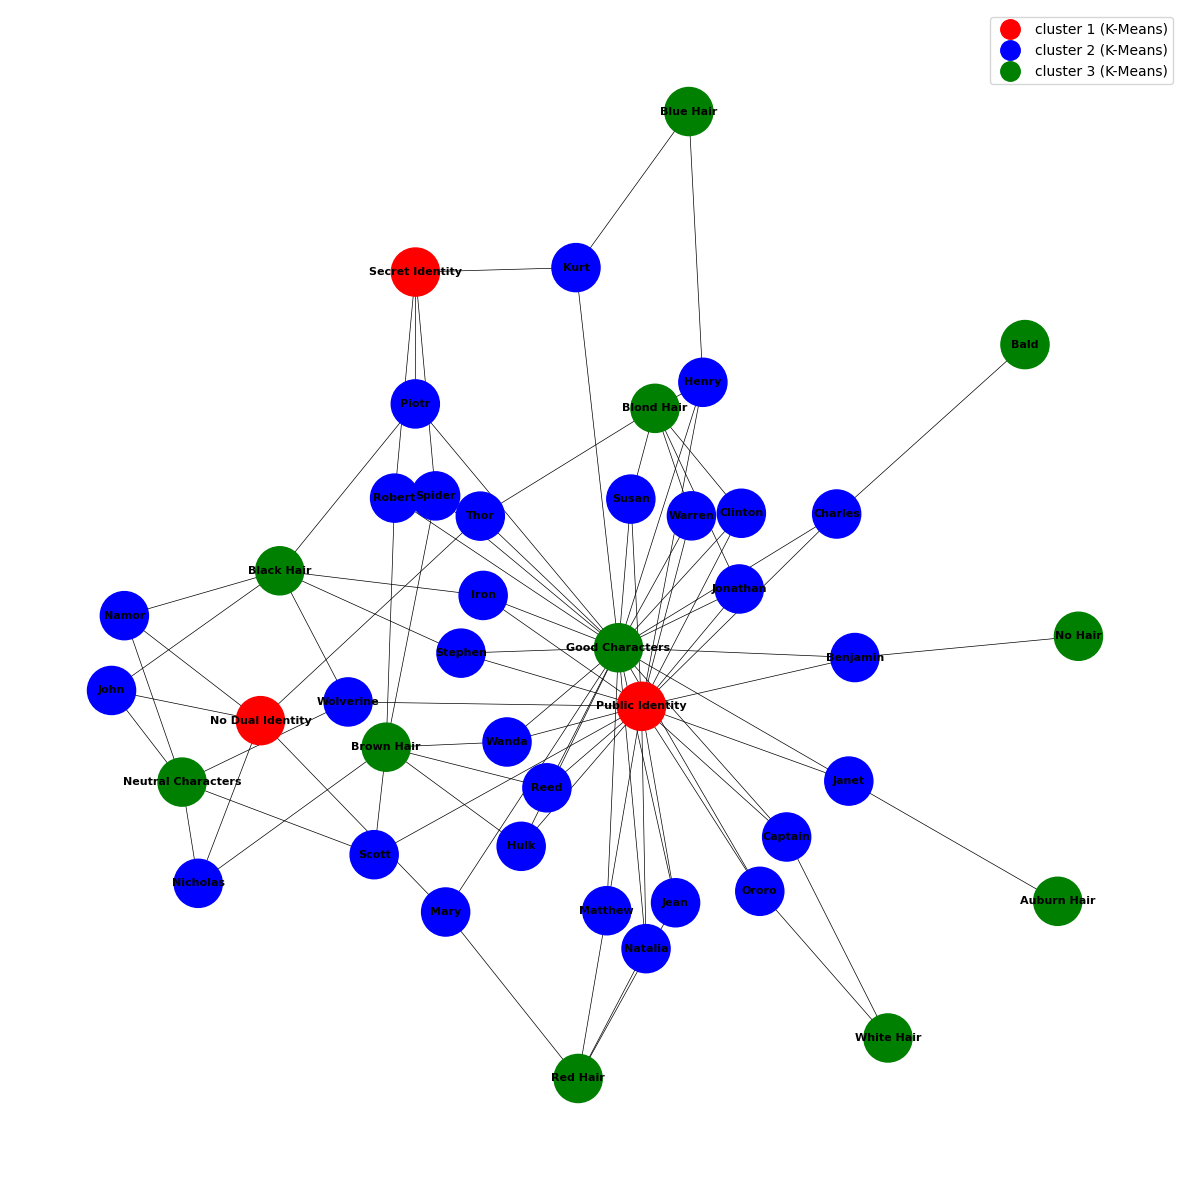

In [ ]:
# K-Means

kmeans = KMeans(n_clusters=3, random_state=0).fit(encoded_features)
clustering = kmeans.labels_

# Assign cluster labels to the nodes in the graph
for i, node in enumerate(G.nodes()):
    G.nodes[node]['cluster'] = clustering[i]

# Visualize the graph with node colors based on clusters
silhouette_score_Kmeans,adjusted_rand_index_Kmeans = print_clustered('K-Means')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Extract relevant features for classification
node_features = nx.get_node_attributes(G, 'node_type')

In [ ]:
X = []
y = []
for node, features in node_features.items():
    X.append(node)
    y.append(G.nodes[node]['cluster'])
print(X,y)


['Public Identity', 'Secret Identity', 'No Dual Identity', 'Good Characters', 'Neutral Characters', 'No Hair', 'White Hair', 'Auburn Hair', 'Black Hair', 'Blue Hair', 'Red Hair', 'Blond Hair', 'Bald', 'Brown Hair', 'Jean', 'Jonathan', 'Ororo', 'Janet', 'Wanda', 'Kurt', 'Thor', 'Nicholas', 'Mary', 'Robert', 'Benjamin', 'Matthew', 'Iron', 'Hulk', 'Reed', 'Charles', 'Stephen', 'John', 'Wolverine', 'Clinton', 'Natalia', 'Scott', 'Warren', 'Captain', 'Namor', 'Spider', 'Henry', 'Piotr', 'Susan'] [0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
# Reshape the feature matrix
X_reshaped = [[x] for x in X]

# Performing one-hot encoding on the feature matrix
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X_reshaped)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [ ]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
# Train a decision tree classifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy_decision = accuracy_score(y_test, y_pred)
precision_decision = precision_score(y_test, y_pred, average='weighted')
recall_decision = recall_score(y_test, y_pred, average='weighted')
f1_decision = f1_score(y_test, y_pred, average='weighted')

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Print performance metrics
print("Accuracy:", accuracy_decision)
print("Precision:", precision_decision)
print("Recall:", recall_decision)
print("F1-score:", f1_decision)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.6666666666666666
Precision: 0.4444444444444444
Recall: 0.6666666666666666
F1-score: 0.5333333333333334
Confusion Matrix:
 [[6 0]
 [3 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
